<a href="https://colab.research.google.com/github/ainunsw3/Clustering/blob/main/%5BClustering%5D_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFORMASI DATASET**
## Latar Belakang

Dalam dunia bisnis ritel, pemahaman terhadap perilaku pelanggan menjadi salah satu faktor krusial dalam menentukan strategi pemasaran, peningkatan layanan, serta pengambilan keputusan berbasis data. Salah satu pendekatan yang umum digunakan untuk memahami perilaku pelanggan adalah melalui segmentasi, yaitu proses pengelompokan pelanggan ke dalam beberapa segmen atau kelompok berdasarkan karakteristik tertentu.

Dengan menerapkan metode **unsupervised learning**, khususnya **clustering**, proyek ini bertujuan untuk membentuk segmentasi pelanggan yang merepresentasikan pola-pola pembelian yang serupa. Hasil segmentasi ini diharapkan dapat memberikan insight yang bernilai bagi pihak manajemen, khususnya dalam menyusun strategi promosi yang lebih tepat sasaran, mengembangkan program loyalitas, serta mengoptimalkan layanan pelanggan.

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [ ]:
                                                                                                                                                                                                                                                                                                                    #Type your code here
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

In [ ]:
# Tampilkan 5 baris pertama dengan function head.
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)

df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [ ]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [ ]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe(include='all')

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,2508,2516,2511.000000,2509,2507,2507,2507,2517,2514,2510,2519.000000,2514,2511.000000,2516.000000,2510.000000,2513
unique,2484,495,NaN,2485,2,43,681,591,100,3,NaN,4,NaN,NaN,NaN,360
top,TX001748,AC00362,NaN,2023-10-20 17:53:13,Debit,Fort Worth,D000573,200.136.146.93,M026,Branch,NaN,Student,NaN,NaN,NaN,2024-11-04 08:09:17
freq,2,12,NaN,2,1942,71,9,12,46,868,NaN,657,NaN,NaN,NaN,18
mean,NaN,NaN,297.656468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.678444,NaN,119.422939,1.121622,5113.438124,NaN
std,NaN,NaN,292.230367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.837359,NaN,70.078513,0.594469,3897.975861,NaN
min,NaN,NaN,0.260000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,10.000000,1.000000,101.250000,NaN
25%,NaN,NaN,81.310000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,63.000000,1.000000,1504.727500,NaN
50%,NaN,NaN,211.360000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,112.000000,1.000000,4734.110000,NaN
75%,NaN,NaN,413.105000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.000000,NaN,161.000000,1.000000,7672.687500,NaN


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

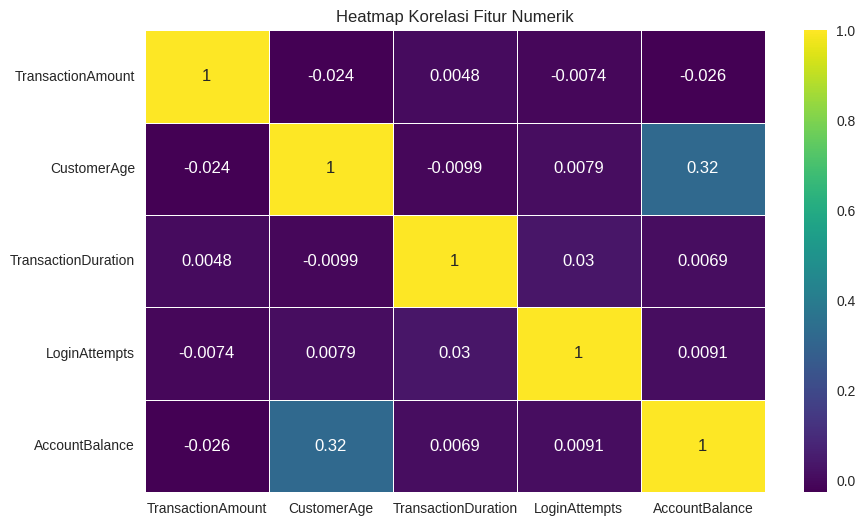

In [ ]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
num_features = df.select_dtypes(include=[np.number])

plt.figure(figsize=(10, 6))
correlation_matrix = num_features.corr()
sns.heatmap(correlation_matrix, annot=True, linewidths=0.5, cmap = 'viridis')
plt.title('Heatmap Korelasi Fitur Numerik')
plt.show()

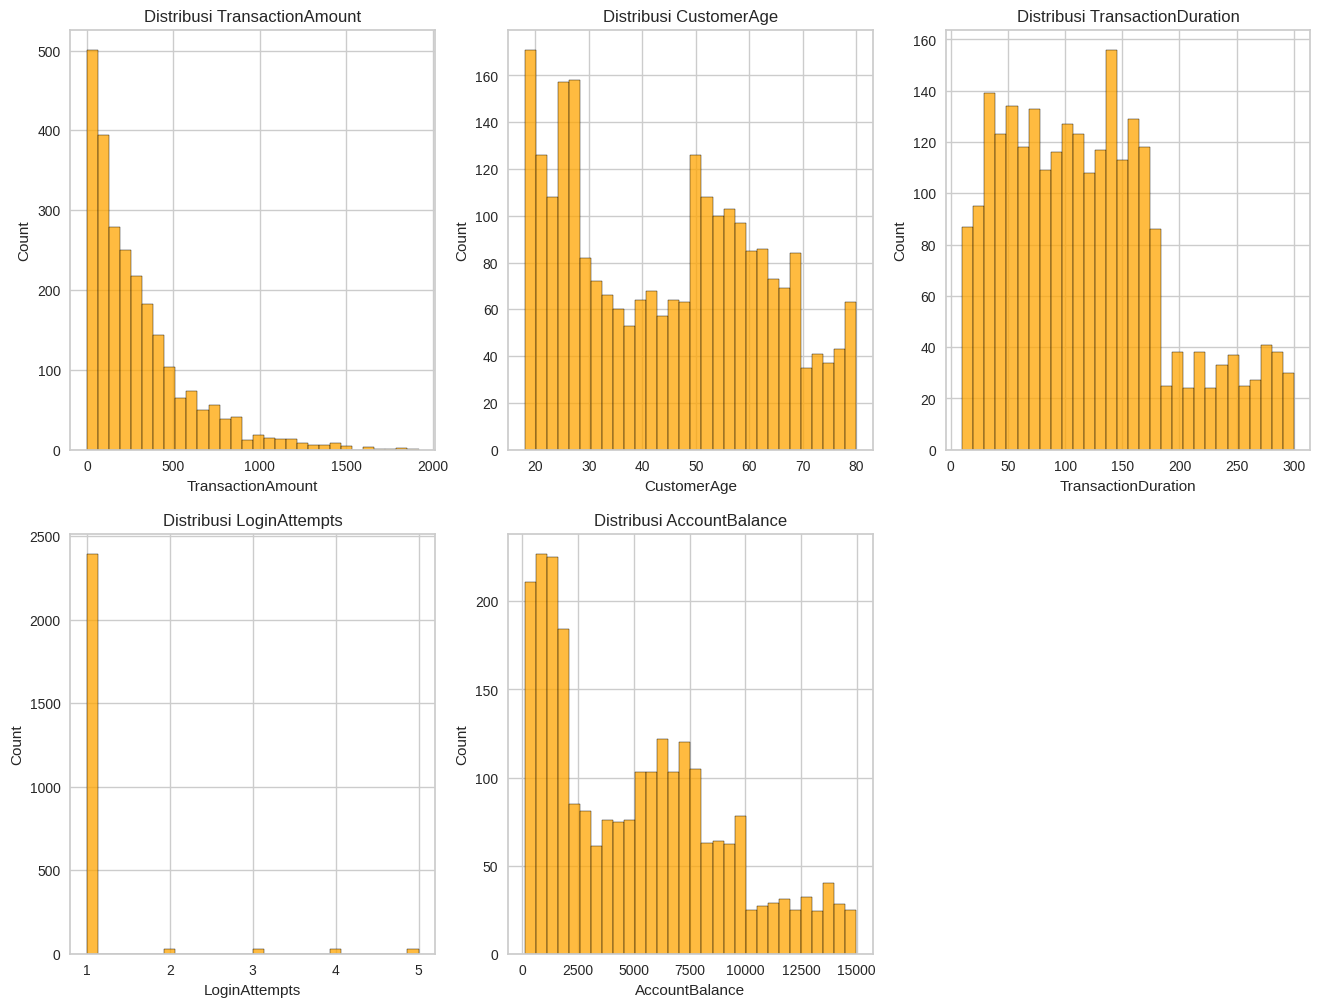

In [ ]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
plt.figure(figsize=(16, 12))

# Distribusi fitur numerik
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[column], bins=30, color='orange')
    plt.title(f'Distribusi {column}')
plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

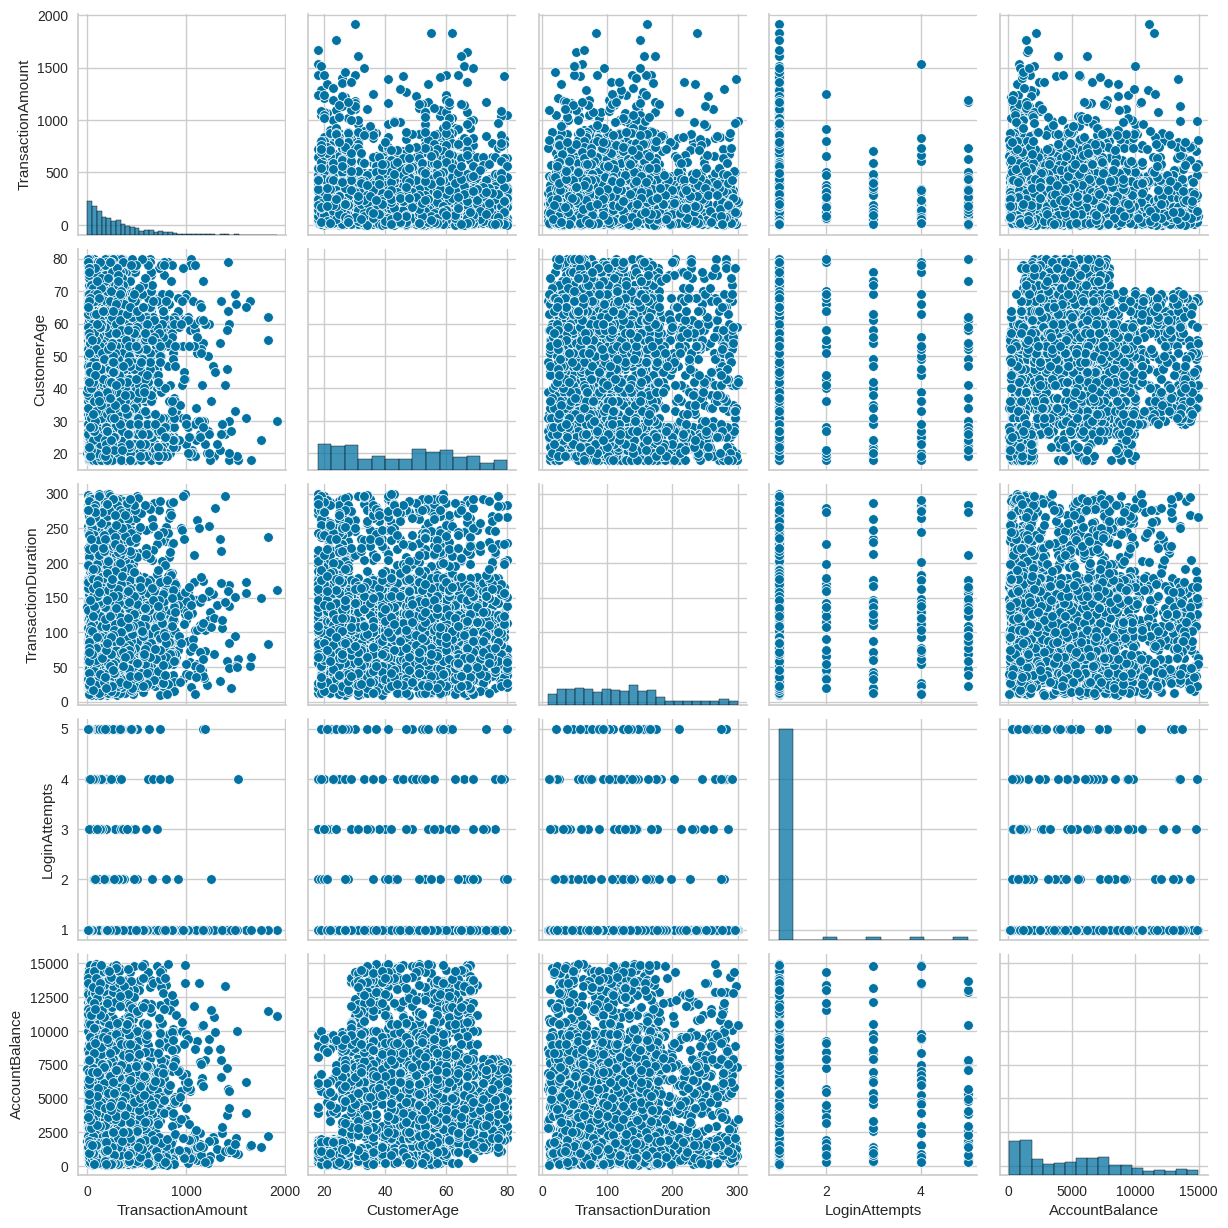

In [ ]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)
sns.pairplot(num_features)
plt.show()

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [ ]:
df_processed = df.copy()

In [ ]:
# Mengecek dataset menggunakan isnull().sum()
missing_values = df.isnull().sum()
missing_values[missing_values>0]

,0
TransactionID,29
AccountID,21
TransactionAmount,26
TransactionDate,28
TransactionType,30
Location,30
DeviceID,30
IP Address,20
MerchantID,23
Channel,27


In [ ]:
# Mengecek dataset menggunakan duplicated().sum()
df.duplicated().sum()

np.int64(21)

In [ ]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.

numeric_colom = df_processed.select_dtypes(include=['number']).columns

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_processed[numeric_colom])

data_scaled = pd.DataFrame(df_scaled, columns=numeric_colom)

df_processed[numeric_colom] = data_scaled

df_processed.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,0.007207,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,0.838710,Doctor,0.244828,0.0,0.336832,2024-11-04 08:08:08
1,TX000002,AC00455,0.195940,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,0.806452,Doctor,0.451724,0.0,0.918055,2024-11-04 08:09:35
2,TX000003,AC00019,0.065680,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,0.016129,Student,0.158621,0.0,0.068637,2024-11-04 08:07:04
3,TX000004,AC00070,0.096016,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,0.129032,Student,0.051724,0.0,0.569198,2024-11-04 08:09:06
4,TX000005,AC00411,0.006874,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,0.648276,0.0,0.492591,2024-11-04 08:06:39


In [ ]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address

df_processed = df_processed.drop(columns=[col for col in df.columns if 'ID' in col.upper() or 'IP' in col.upper()])
df_processed.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,0.007207,2023-04-11 16:29:14,Debit,San Diego,ATM,0.838710,Doctor,0.244828,0.0,0.336832,2024-11-04 08:08:08
1,0.195940,2023-06-27 16:44:19,Debit,Houston,ATM,0.806452,Doctor,0.451724,0.0,0.918055,2024-11-04 08:09:35
2,0.065680,2023-07-10 18:16:08,Debit,Mesa,Online,0.016129,Student,0.158621,0.0,0.068637,2024-11-04 08:07:04
3,0.096016,2023-05-05 16:32:11,Debit,Raleigh,Online,0.129032,Student,0.051724,0.0,0.569198,2024-11-04 08:09:06
4,0.006874,2023-10-16 17:51:24,Credit,Atlanta,Online,NaN,Student,0.648276,0.0,0.492591,2024-11-04 08:06:39


In [ ]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melalukan encoding.

kategorikal_col = df_processed.select_dtypes(include=['object']).columns

encoders = {}
df_encode = df_processed.copy()

for col in kategorikal_col:
  label_encoder = LabelEncoder()
  df_encode[col] = label_encoder.fit_transform(df_encode[col].astype(str))
  encoders[col] = label_encoder
  df_processed = df_encode

df_processed.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,0.007207,680,1,36,0,0.838710,0,0.244828,0.0,0.336832,105
1,0.195940,1178,1,15,0,0.806452,0,0.451724,0.0,0.918055,192
2,0.065680,1262,1,23,2,0.016129,3,0.158621,0.0,0.068637,41
3,0.096016,818,1,33,2,0.129032,3,0.051724,0.0,0.569198,163
4,0.006874,1939,0,1,2,NaN,3,0.648276,0.0,0.492591,16


In [ ]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.

df_processed.columns.tolist()

['TransactionAmount',
 'TransactionDate',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'PreviousTransactionDate']

In [ ]:
df_processed.isnull().mean() * 100

,0
TransactionAmount,1.024832
TransactionDate,0.000000
TransactionType,0.000000
Location,0.000000
Channel,0.000000
CustomerAge,0.709499
CustomerOccupation,0.000000
TransactionDuration,1.024832
LoginAttempts,0.827749
AccountBalance,1.064249


In [ ]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).

df_processed[df_processed.select_dtypes(include='number').columns] = df_processed.select_dtypes(include='number').fillna(df_processed.median(numeric_only=True))

df_processed.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,0.007207,680,1,36,0,0.838710,0,0.244828,0.0,0.336832,105
1,0.195940,1178,1,15,0,0.806452,0,0.451724,0.0,0.918055,192
2,0.065680,1262,1,23,2,0.016129,3,0.158621,0.0,0.068637,41
3,0.096016,818,1,33,2,0.129032,3,0.051724,0.0,0.569198,163
4,0.006874,1939,0,1,2,0.435484,3,0.648276,0.0,0.492591,16


In [ ]:
df_processed.isnull().sum()

,0
TransactionAmount,0
TransactionDate,0
TransactionType,0
Location,0
Channel,0
CustomerAge,0
CustomerOccupation,0
TransactionDuration,0
LoginAttempts,0
AccountBalance,0


In [ ]:
# Menghapus data duplikat menggunakan drop_duplicates().
df_processed = df_processed.drop_duplicates()
df_processed.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,0.007207,680,1,36,0,0.838710,0,0.244828,0.0,0.336832,105
1,0.195940,1178,1,15,0,0.806452,0,0.451724,0.0,0.918055,192
2,0.065680,1262,1,23,2,0.016129,3,0.158621,0.0,0.068637,41
3,0.096016,818,1,33,2,0.129032,3,0.051724,0.0,0.569198,163
4,0.006874,1939,0,1,2,0.435484,3,0.648276,0.0,0.492591,16


# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [ ]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.

df_processed.describe()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,2514.000000,2514.000000,2514.000000,2514.000000,2514.00000,2514.000000,2514.000000,2514.000000,2514.000000,2514.000000,2514.000000
mean,0.154622,1256.328958,0.787987,21.284010,1.01074,0.429415,1.530231,0.377490,0.030430,0.336864,180.889021
std,0.151734,725.581982,0.437042,12.397534,0.83084,0.286157,1.150477,0.240156,0.148674,0.260683,103.956287
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.043213,628.250000,1.000000,11.000000,0.00000,0.145161,0.250000,0.182759,0.000000,0.095324,91.250000
50%,0.110014,1256.500000,1.000000,21.000000,1.00000,0.435484,2.000000,0.351724,0.000000,0.311416,181.000000
75%,0.213328,1884.750000,1.000000,32.000000,2.00000,0.661290,3.000000,0.520690,0.000000,0.506870,272.000000
max,1.000000,2485.000000,2.000000,43.000000,3.00000,1.000000,4.000000,1.000000,1.000000,1.000000,360.000000


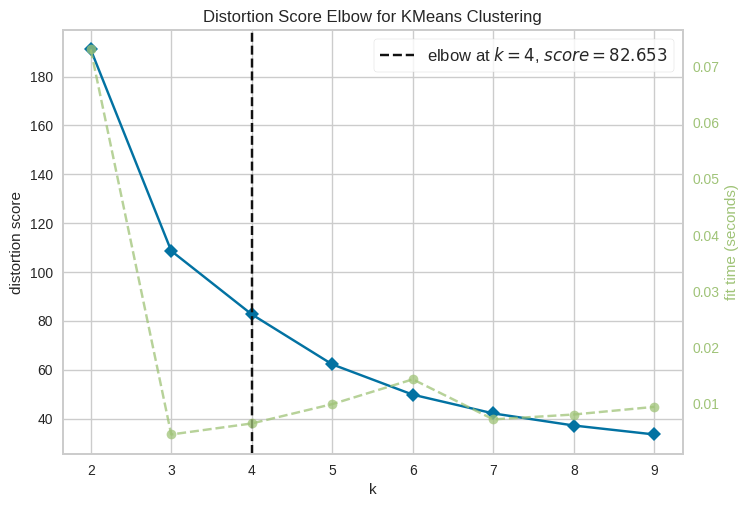

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
x = df_processed.iloc[:,[5,9]].values

kmeans = KMeans()

# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(2, 10))

# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(x)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

In [ ]:
# Menggunakan algoritma K-Means Clustering

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(x)

# Mendapatkan label cluster
labels = kmeans.labels_

df_processed['Cluster'] = labels
df_processed.head()

/tmp/ipython-input-23-1330863682.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_processed['Cluster'] = labels


,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Cluster
0,0.007207,680,1,36,0,0.838710,0,0.244828,0.0,0.336832,105,2
1,0.195940,1178,1,15,0,0.806452,0,0.451724,0.0,0.918055,192,3
2,0.065680,1262,1,23,2,0.016129,3,0.158621,0.0,0.068637,41,1
3,0.096016,818,1,33,2,0.129032,3,0.051724,0.0,0.569198,163,0
4,0.006874,1939,0,1,2,0.435484,3,0.648276,0.0,0.492591,16,0


Jalankan cell code ini untuk menyimpan model kamu.

In [ ]:
# Menyimpan model menggunakan joblib
import joblib
joblib.dump(kmeans, "model_clustering.h5")

['model_clustering.h5']

In [ ]:
# Menghitung dan menampilkan nilai Silhouette Score.
k = 4
score = silhouette_score(x, labels)
print(f"Silhouette Score untuk k={k}: {score:.3f}")

Silhouette Score untuk k=4: 0.480


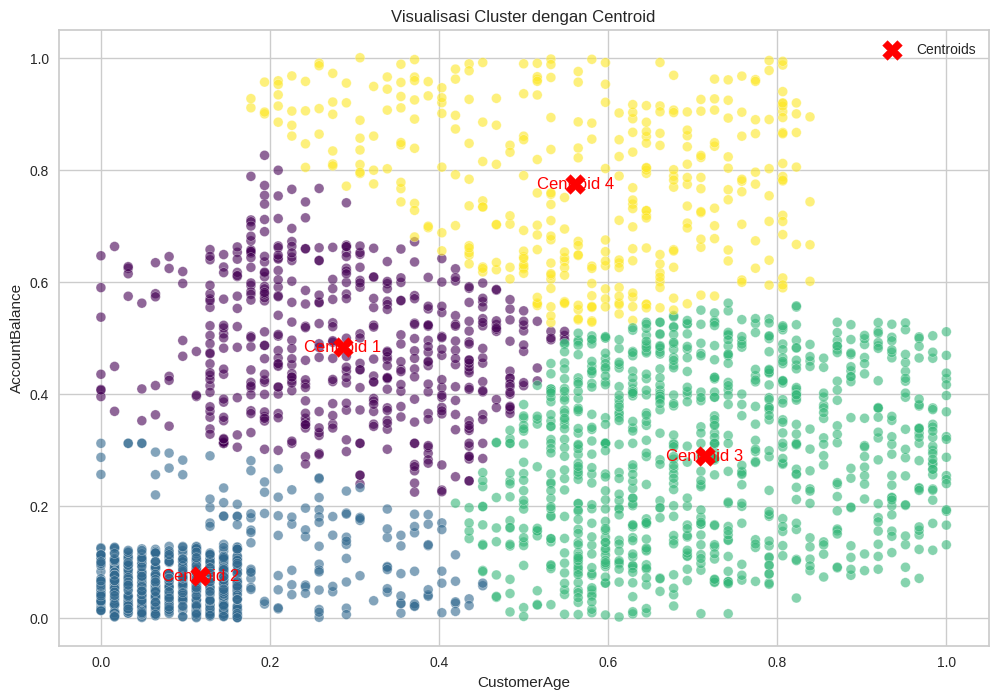

Nilai Centroids:
Centroid 1: Annual Income = 0.29, Spending Score = 0.48
Centroid 2: Annual Income = 0.12, Spending Score = 0.08
Centroid 3: Annual Income = 0.71, Spending Score = 0.29
Centroid 4: Annual Income = 0.56, Spending Score = 0.77


In [ ]:
# Membuat visualisasi hasil clustering

# Menentukan posisi centroid
centroids = kmeans.cluster_centers_

# Visualisasi cluster
plt.figure(figsize=(12, 8))

# Plot data
plt.scatter(x[:, 0], x[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6, edgecolors='w', marker='o')

# Plot centroid
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')

# Menambahkan label centroid pada plot
for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[1], f'Centroid {i+1}', color='red', fontsize=12, ha='center', va='center')

# Menambahkan judul dan label
plt.title('Visualisasi Cluster dengan Centroid')
plt.xlabel('CustomerAge')
plt.ylabel('AccountBalance')
plt.legend()

plt.show()

# Menampilkan nilai centroid
print("Nilai Centroids:")
for i, centroid in enumerate(centroids):
    print(f"Centroid {i+1}: Annual Income = {centroid[0]:.2f}, Spending Score = {centroid[1]:.2f}")

In [ ]:
# Membangun model menggunakan PCA.
pca_model =PCA(n_components=2)
df_pca = pca_model.fit_transform(x)

# Menyimpan data PCA sebagai Dataframe dengan nama PCA_<numbers>
pca_result = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])

# Pastikan kamu membangun model Kmeans baru dengan data yang sudah dimodifikasi melalui PCA.
k_means = KMeans(n_clusters=4, random_state=42)
k_means.fit(pca_result)

KMeans(n_clusters=4, random_state=42)

In [ ]:
pca_result

,PCA1,PCA2
0,0.327633,-0.245315
1,0.650134,0.239302
2,-0.491594,0.032958
3,-0.101227,0.366008
4,0.098185,0.121027
...,...,...
2509,0.077205,-0.203044
2510,-0.413578,0.029516
2511,-0.466960,-0.068704
2512,-0.034900,0.158561


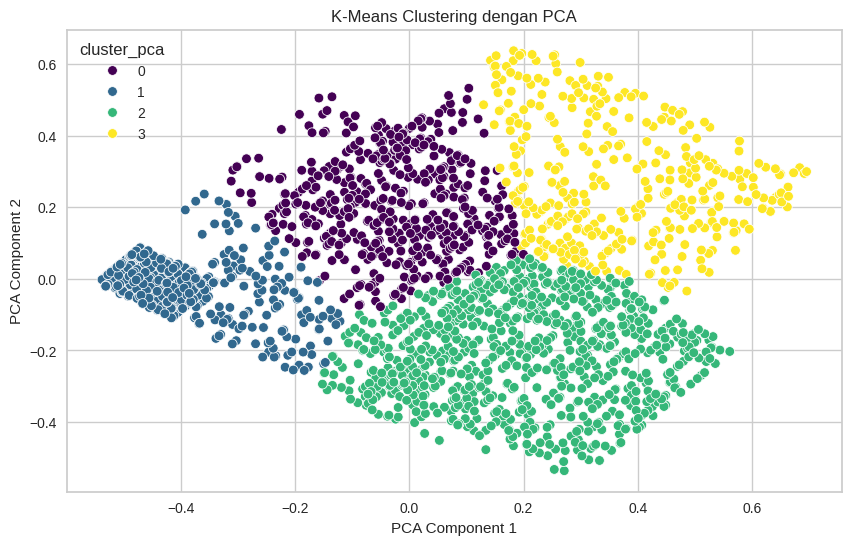

In [ ]:
pca_result['cluster_pca'] = k_means.labels_
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_result, x='PCA1', y='PCA2', hue='cluster_pca', palette='viridis')
plt.title('K-Means Clustering dengan PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [ ]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# Pastikan yang disimpan model yang sudah melalui .fit berdasarkan dataset yang sudah dilakukan PCA

joblib.dump(k_means, "PCA_model_clustering.h5")

['PCA_model_clustering.h5']

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [ ]:
df_processed.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Cluster
0,0.007207,680,1,36,0,0.838710,0,0.244828,0.0,0.336832,105,2
1,0.195940,1178,1,15,0,0.806452,0,0.451724,0.0,0.918055,192,3
2,0.065680,1262,1,23,2,0.016129,3,0.158621,0.0,0.068637,41,1
3,0.096016,818,1,33,2,0.129032,3,0.051724,0.0,0.569198,163,0
4,0.006874,1939,0,1,2,0.435484,3,0.648276,0.0,0.492591,16,0


In [ ]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max.


# Groupby dan agregasi hanya untuk kolom numerik
df_grouped = df_processed[numeric_colom].groupby(df_processed['Cluster']).agg(['min', 'max', 'mean'])

print(df_grouped)

print("\n=== Distribusi Jumlah Anggota per Cluster ===")
print(df_processed['Cluster'].value_counts())

        TransactionAmount                     CustomerAge                      \
                      min       max      mean         min       max      mean   
Cluster                                                                         
0                0.000031  1.000000  0.154610    0.000000  0.548387  0.284107   
1                0.000000  0.918269  0.156874    0.000000  0.451613  0.115953   
2                0.000302  0.953561  0.154398    0.419355  1.000000  0.712160   
3                0.000459  0.954092  0.150708    0.177419  0.838710  0.560767   

        TransactionDuration                     LoginAttempts                 \
                        min       max      mean           min  max      mean   
Cluster                                                                        
0                  0.000000  1.000000  0.379085           0.0  1.0  0.025198   
1                  0.000000  0.996552  0.378639           0.0  1.0  0.028571   
2                  0.000000  0.9

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
1. **Cluster 0: (Nasabah muda dewasa  dengan saldo tinggi)**:
  - **Rata-rata (mean) CustomerAge:** <Sebelum inverse> <Setelah inverse>0.284
  - **Rentang CustomerAge:** <Sebelum inverse> <Setelah inverse>0 - 0.548
  - **Rata-rata (mean) AccountBalance:** <Sebelum inverse> <Setelah inverse>0.48
  - **Rentang AccountBalance:** <Sebelum inverse> <Setelah inverse>0.224 - 0.826
  - **Rata-rata (mean) TransactionAmount:** <Sebelum inverse> <Setelah inverse>0.155
  - **Jumlah Cluster:** <Sebelum inverse> <Setelah inverse>506
  - **Analisis:** Cluster ini mencakup nasabah usia muda ke dewasa yang memiliki saldo tinggi. Mereka termasuk dalam nasabah yang sering melakukan transaksi. Cluster ini berpotensi untuk upgrade layanan.
2. **Cluster 1: (Nasabah muda dengan saldo rendah)**:
  - **Rata-rata (mean) CustomerAge:** <Sebelum inverse> <Setelah inverse>0.12
  - **Rentang CustomerAge:** <Sebelum inverse> <Setelah inverse>0 - 0.452
  - **Rata-rata (mean) AccountBalance:** <Sebelum inverse> <Setelah inverse>0.08
  - **Rentang AccountBalance:** <Sebelum inverse> <Setelah inverse>0 - 0.312
  - **Rata-rata (mean) TransactionAmount:** <Sebelum inverse> <Setelah inverse>0.157
  - **Jumlah Cluster:** <Sebelum inverse> <Setelah inverse>735
  - **Analisis:** Cluster ini mencakup nasabah yang paling muda dengan saldo yang rendah. Mereka juga memiliki aktifitas transaksi yang tinggi yang kemungkinan berasal dari pekerja muda. Cluster ini cocok untuk dilakukan pendekatan promosi ringan melalui program edukasi keuangan, produk tabungan berjangka, atau reward transaksi rutin.
3. **Cluster 2: (Nasabah dewasa  dengan saldo stabil)**:
  - **Rata-rata (mean) CustomerAge:** <Sebelum inverse> <Setelah inverse>0.71
  - **Rentang CustomerAge:** <Sebelum inverse> <Setelah inverse>0.419 - 1
  - **Rata-rata (mean) AccountBalance:** <Sebelum inverse> <Setelah inverse>0.29
  - **Rentang AccountBalance:** <Sebelum inverse> <Setelah inverse>0.001 - 0.562
  - **Rata-rata (mean) TransactionAmount:** <Sebelum inverse> <Setelah inverse>0.154
  - **Jumlah Cluster:** <Sebelum inverse> <Setelah inverse>903
  - **Analisis:** Cluster ini mencakup nasabah dengan usia dewasa dengan saldo yang stabil namun tidak terlalu besar. mereka memiliki aktivitas stransaksi yang sedang. cocok ditawarkan produk asuransi atau investasi.
4. **Cluster 3: (Nasabah dewasa dengan saldo tinggi)**:
  - **Rata-rata (mean) CustomerAge:** <Sebelum inverse> <Setelah inverse>0.56
  - **Rentang CustomerAge:** <Sebelum inverse> <Setelah inverse>0.177 - 0.839
  - **Rata-rata (mean) AccountBalance:** <Sebelum inverse> <Setelah inverse>0.77
  - **Rentang AccountBalance:** <Sebelum inverse> <Setelah inverse>0.527 - 1
  - **Rata-rata (mean) TransactionAmount:** <Sebelum inverse> <Setelah inverse>0.150
  - **Jumlah Cluster:** <Sebelum inverse> <Setelah inverse>370
  - **Analisis:** Cluster ini mencakup nasabah dengan usia menengah keatas dan memiliki saldo yang tinggi. Mereka memiliki aktivitas transaksi yang rendah. Nasabah ini kemungkinan termasuk dalam kelompok yang mapan finansial dan VIP customer. Cluster ini cocok ditawarkan produk premium, member VIP, dan produk investasi.

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [ ]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
df_processed.rename(columns={'Cluster': 'Target'}, inplace=True)
df_processed.head()

/tmp/ipython-input-34-2282847784.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_processed.rename(columns={'Cluster': 'Target'}, inplace=True)


,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Target
0,0.007207,680,1,36,0,0.838710,0,0.244828,0.0,0.336832,105,2
1,0.195940,1178,1,15,0,0.806452,0,0.451724,0.0,0.918055,192,3
2,0.065680,1262,1,23,2,0.016129,3,0.158621,0.0,0.068637,41,1
3,0.096016,818,1,33,2,0.129032,3,0.051724,0.0,0.569198,163,0
4,0.006874,1939,0,1,2,0.435484,3,0.648276,0.0,0.492591,16,0


In [ ]:
# Simpan Data
from google.colab import files

df_processed.to_csv('data_clustering_fix.csv', index=False)

files.download('data_clustering_fix.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# inverse dataset ke rentang normal untuk numerikal

df_processed[numeric_colom] = scaler.inverse_transform(df_processed[numeric_colom])
# tampilkan dataset yang sudah di-inverse
df_processed.head()

/tmp/ipython-input-36-1614534338.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_processed[numeric_colom] = scaler.inverse_transform(df_processed[numeric_colom])


,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Target
0,14.09,680,1,36,0,70.0,0,81.0,1.0,5112.21,105,2
1,376.24,1178,1,15,0,68.0,0,141.0,1.0,13758.91,192,3
2,126.29,1262,1,23,2,19.0,3,56.0,1.0,1122.35,41,1
3,184.50,818,1,33,2,26.0,3,25.0,1.0,8569.06,163,0
4,13.45,1939,0,1,2,45.0,3,198.0,1.0,7429.40,16,0


In [ ]:
# inverse dataset yang sudah diencode ke kategori aslinya.
# Lengkapi kode berikut jika ingin menerapkan kriteria ini (silakan hapus simbol pagar pada kode yang akan digunakan.)

df_inverse = df_processed.copy()

for col in kategorikal_col:
    encoder = encoders[col]
    df_inverse[col] = encoder.inverse_transform(df_inverse[col].astype(int))

df_inverse.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Target
0,14.09,2023-04-11 16:29:14,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08,2
1,376.24,2023-06-27 16:44:19,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35,3
2,126.29,2023-07-10 18:16:08,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04,1
3,184.50,2023-05-05 16:32:11,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06,0
4,13.45,2023-10-16 17:51:24,Credit,Atlanta,Online,45.0,Student,198.0,1.0,7429.40,2024-11-04 08:06:39,0


In [ ]:
# Lakukan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal seperti pada basic tetapi menggunakan data yang sudah diinverse.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max kembali setelah melakukan inverse.

col_kategorikal = ['TransactionType', 'Channel', 'CustomerOccupation', 'Location']
df_grouped_numerik = df_inverse[numeric_colom].groupby(df_inverse['Target']).agg(['min', 'max', 'mean'])

def mode(x):
  return x.mode().iloc[0] if not x.mode().empty else None

df_grouped_kategorikal = df_inverse[col_kategorikal].groupby(df_inverse['Target']).agg(mode)

print('=== Analisis Numerik ===')
print(df_grouped_numerik)
print('=== Analisis Kategorikal ===')
print(df_grouped_kategorikal)

=== Analisis Numerik ===
       TransactionAmount                      CustomerAge                   \
                     min      max        mean         min   max       mean   
Target                                                                       
0                   0.32  1919.11  296.933715        18.0  52.0  35.614625   
1                   0.26  1762.28  301.278340        18.0  46.0  25.189116   
2                   0.84  1830.00  296.527187        44.0  80.0  62.153931   
3                   1.14  1831.02  289.445216        29.0  70.0  52.767568   

       TransactionDuration                    LoginAttempts                 \
                       min    max        mean           min  max      mean   
Target                                                                       
0                     10.0  300.0  119.934783           1.0  5.0  1.100791   
1                     10.0  299.0  119.805442           1.0  5.0  1.114286   
2                     10.0  299.0  117

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 0: (Nasabah muda dewasa  dengan saldo tinggi)**:
  - **Rata-rata (mean) CustomerAge:** <Sebelum inverse> <Setelah inverse>35,6
  - **Rentang CustomerAge:** <Sebelum inverse> <Setelah inverse>18 - 52 tahun
  - **Rata-rata (mean) AccountBalance:** <Sebelum inverse> <Setelah inverse>7.299
  - **Rentang AccountBalance:** <Sebelum inverse> <Setelah inverse>3.438 - 12.385
  - **Rata-rata (mean) TransactionAmount:** <Sebelum inverse> <Setelah inverse>296,9
  - **Nilai populer (mode) TransactionTyle:** <Sebelum inverse> <Setelah inverse>Debit
  - **Nilai populer (mode) Chanel:** <Sebelum inverse> <Setelah inverse>Branch
  - **Nilai populer (mode) CustomerOccupation:** <Sebelum inverse> <Setelah inverse>Enginer
  - **Jumlah Cluster:** <Sebelum inverse> <Setelah inverse>506
  - **Analisis:** Cluster ini mencakup nasabah usia muda ke dewasa dengan rentang 18-51 tahun yang memiliki saldo tinggi. Mereka termasuk dalam nasabah yang sering melakukan transaksi. Mereka mayoritas bertransaksi melalui Branch dan mayoritas bekerja sebagai enginer. Cluster ini berpotensi ditargetkan menggunakan produk investasi.
2. **Cluster 1: (Nasabah muda dengan saldo rendah)**:
  - **Rata-rata (mean) CustomerAge:** <Sebelum inverse> <Setelah inverse>25,2
  - **Rentang CustomerAge:** <Sebelum inverse> <Setelah inverse>18 - 46 tahun
  - **Rata-rata (mean) AccountBalance:** <Sebelum inverse> <Setelah inverse>1.218
  - **Rentang AccountBalance:** <Sebelum inverse> <Setelah inverse>101 - 4.737
  - **Rata-rata (mean) TransactionAmount:** <Sebelum inverse> <Setelah inverse>301,3
  - **Nilai populer (mode) TransactionTyle:** <Sebelum inverse> <Setelah inverse>Debit
  - **Nilai populer (mode) Chanel:** <Sebelum inverse> <Setelah inverse>Branch
  - **Nilai populer (mode) CustomerOccupation:** <Sebelum inverse> <Setelah inverse>Student
  - **Jumlah Cluster:** <Sebelum inverse> <Setelah inverse>735
  - **Analisis:** Cluster ini mencakup nasabah yang paling muda dengan rata-rata usia 25 tahun. Mereka memiliki saldo rendah tetapi memiliki aktifitas transaksi yang tinggi. Mereka mayoritas adalah pelajar. Cluster ini cocok untuk dilakukan pendekatan promosi ringan melalui program edukasi keuangan, produk digital e-walet, atau reward transaksi rutin.
3. **Cluster 2: (Nasabah dewasa dengan saldo cukup stabil)**:
  - **Rata-rata (mean) CustomerAge:** <Sebelum inverse> <Setelah inverse>62,2
  - **Rentang CustomerAge:** <Sebelum inverse> <Setelah inverse>44 - 80 tahun
  - **Rata-rata (mean) AccountBalance:** <Sebelum inverse> <Setelah inverse>4.391
  - **Rentang AccountBalance:** <Sebelum inverse> <Setelah inverse>120 - 8.459
  - **Rata-rata (mean) TransactionAmount:** <Sebelum inverse> <Setelah inverse>296,5
  - **Nilai populer (mode) TransactionTyle:** <Sebelum inverse> <Setelah inverse>Debit
  - **Nilai populer (mode) Chanel:** <Sebelum inverse> <Setelah inverse>ATM
  - **Nilai populer (mode) CustomerOccupation:** <Sebelum inverse> <Setelah inverse>Retired
  - **Jumlah Cluster:** <Sebelum inverse> <Setelah inverse>903
  - **Analisis:** Cluster ini mencakup nasabah dengan rata-rata usia 62 tahun dengan saldo yang stabil namun tidak terlalu besar. Mereka memiliki aktivitas stransaksi yang sedang. Rata-rata cluster ini merupakan pensiunan. Cocok ditawarkan produk tabungan pensiun atau investasi.
4. **Cluster 3: (Nasabah dewasa dengan saldo tinggi)**:
  - **Rata-rata (mean) CustomerAge:** <Sebelum inverse> <Setelah inverse>52,8
  - **Rentang CustomerAge:** <Sebelum inverse> <Setelah inverse>29 - 70 tahun
  - **Rata-rata (mean) AccountBalance:** <Sebelum inverse> <Setelah inverse>11.619
  - **Rentang AccountBalance:** <Sebelum inverse> <Setelah inverse>7.943 - 14.977
  - **Rata-rata (mean) TransactionAmount:** <Sebelum inverse> <Setelah inverse>289,4
  - **Nilai populer (mode) TransactionTyle:** <Sebelum inverse> <Setelah inverse>Debit
  - **Nilai populer (mode) Chanel:** <Sebelum inverse> <Setelah inverse>Branch
  - **Nilai populer (mode) CustomerOccupation:** <Sebelum inverse> <Setelah inverse>Doctor
  - **Jumlah Cluster:** <Sebelum inverse> <Setelah inverse>370
  - **Analisis:** Cluster ini mencakup nasabah dengan usia menengah keatas dengan rata-rata usia 52 tahun dan memiliki saldo yang tinggi. Mereka memiliki aktivitas transaksi yang rendah dan mayoritas berprofesi sebagai dokter. Nasabah ini kemungkinan termasuk dalam kelompok yang mapan finansial dan VIP customer. Cluster ini cocok ditawarkan produk investasi, member VIP, dan perlindungan dana.

In [ ]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.

data_clustering_inverse = df_inverse.copy()

data_clustering_inverse.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Target
0,14.09,2023-04-11 16:29:14,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08,2
1,376.24,2023-06-27 16:44:19,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35,3
2,126.29,2023-07-10 18:16:08,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04,1
3,184.50,2023-05-05 16:32:11,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06,0
4,13.45,2023-10-16 17:51:24,Credit,Atlanta,Online,45.0,Student,198.0,1.0,7429.40,2024-11-04 08:06:39,0


In [ ]:
# Simpan Data

data_clustering_inverse.to_csv('data_clustering_inverse.csv', index=False)
files.download('data_clustering_inverse.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

End of Code.